# Monte Carlo Integration with Python

## Dr. Tirthajyoti Sarkar ([LinkedIn](https://www.linkedin.com/in/tirthajyoti-sarkar-2127aa7/), [Github](https://github.com/tirthajyoti)), Fremont, CA, July 2020

---

### Disclaimer

The inspiration for this demo/notebook stemmed from [Georgia Tech's Online Masters in Analytics (OMSA) program](https://www.gatech.edu/academics/degrees/masters/analytics-online-degree-oms-analytics) study material. I am proud to pursue this excellent Online MS program. You can also check the details [here](http://catalog.gatech.edu/programs/analytics-ms/#onlinetext).

## What is Monte Carlo integration?

### A casino trick for mathematics

![mc-1](https://silversea-h.assetsadobe2.com/is/image/content/dam/silversea-com/ports/m/monte-carlo/silversea-luxury-cruises-monte-carlo.jpg?hei=390&wid=930&fit=crop)

Monte Carlo, is in fact, the name of the world-famous casino located in the eponymous district of the city-state (also called a Principality) of Monaco, on the world-famous French Riviera.

It turns out that the casino inspired the minds of famous scientists to devise an intriguing mathematical technique for solving complex problems in statistics, numerical computing, system simulation.

### Modern origin (to make 'The Bomb')

![trinity](https://www.nps.gov/whsa/learn/historyculture/images/WHSA_trinity_cloud.jpg?maxwidth=1200&maxheight=1200&autorotate=false)

One of the first and most famous uses of this technique was during the Manhattan Project when the chain-reaction dynamics in highly enriched uranium presented an unimaginably complex theoretical calculation to the scientists. Even the genius minds like John Von Neumann, Stanislaw Ulam, Nicholas Metropolis could not tackle it in the traditional way. They, therefore, turned to the wonderful world of random numbers and let these probabilistic quantities tame the originally intractable calculations.

Amazingly, these random variables could solve the computing problem, which stymied the sure-footed deterministic approach. The elements of uncertainty actually won.

Just like uncertainty and randomness rule in the world of Monte Carlo games. That was the inspiration for this particular moniker.

### Today

Today, it is a technique used in a wide swath of fields,
- risk analysis, financial engineering, 
- supply chain logistics, 
- statistical learning and modeling,
- computer graphics, image processing, game design,
- large system simulations, 
- computational physics, astronomy, etc.

For all its successes and fame, the basic idea is deceptively simple and easy to demonstrate. We demonstrate it in this article with a simple set of Python code.

## The code and the demo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

### A simple function which is difficult to integrate analytically

While the general Monte Carlo simulation technique is much broader in scope, we focus particularly on the Monte Carlo integration technique here.

It is nothing but a numerical method for computing complex definite integrals, which lack closed-form analytical solutions.

Say, we want to calculate,

$$\int_{0}^{4}\sqrt[4]{15x^3+21x^2+41x+3}.e^{-0.5x} dx$$

In [97]:
def f1(x):
    return (15*x**3+21*x**2+41*x+3)**(1/4) * (np.exp(-0.5*x))

### Plot

In [129]:
x = np.arange(0,4.1,0.1)
y = f1(x)

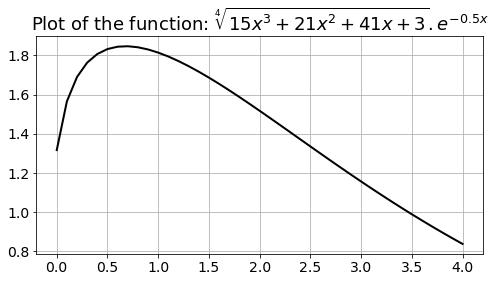

In [130]:
plt.figure(figsize=(8,4))
plt.title("Plot of the function: $\sqrt[4]{15x^3+21x^2+41x+3}.e^{-0.5x}$",
         fontsize=18)
plt.plot(x,y,'-',c='k',lw=2)
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### Riemann sums?

There are many such techniques under the general category of [Riemann sum](https://medium.com/r/?url=https%3A%2F%2Fen.wikipedia.org%2Fwiki%2FRiemann_sum). The idea is just to divide the area under the curve into small rectangular or trapezoidal pieces, approximate them by the simple geometrical calculations, and sum those components up.

For a simple illustration, I show such a scheme with only 5 equispaced intervals.

For the programmer friends, in fact, there is a [ready-made function in the Scipy package](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html#scipy.integrate.quad) which can do this computation fast and accurately.

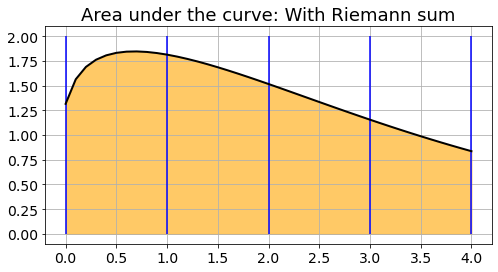

In [135]:
rect = np.linspace(0,4,5)

plt.figure(figsize=(8,4))
plt.title("Area under the curve: With Riemann sum",
         fontsize=18)
plt.plot(x,y,'-',c='k',lw=2)
plt.fill_between(x,y1=y,y2=0,color='orange',alpha=0.6)
for i in range(5):
    plt.vlines(x=rect[i],ymin=0,ymax=2,color='blue')
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### What if I go random?

What if I told you that I do not need to pick the intervals so uniformly, and, in fact, I can go completely probabilistic, and pick 100% random intervals to compute the same integral?

Crazy talk? My choice of samples could look like this…

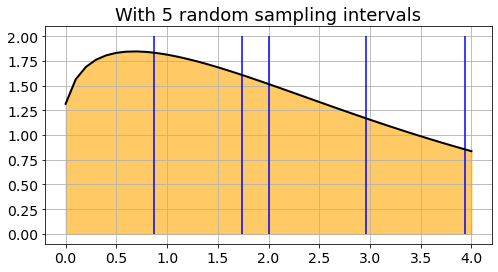

In [136]:
rand_lines = 4*np.random.uniform(size=5)

plt.figure(figsize=(8,4))
plt.title("With 5 random sampling intervals",
         fontsize=18)
plt.plot(x,y,'-',c='k',lw=2)
plt.fill_between(x,y1=y,y2=0,color='orange',alpha=0.6)
for i in range(5):
    plt.vlines(x=rand_lines[i],ymin=0,ymax=2,color='blue')
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Or, this?

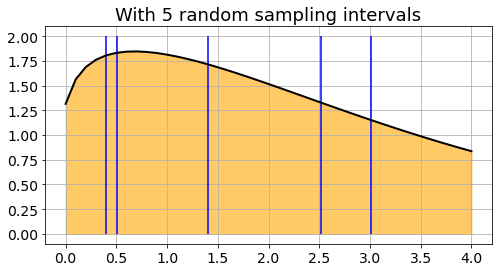

In [166]:
rand_lines = 4*np.random.uniform(size=5)

plt.figure(figsize=(8,4))
plt.title("With 5 random sampling intervals",
         fontsize=18)
plt.plot(x,y,'-',c='k',lw=2)
plt.fill_between(x,y1=y,y2=0,color='orange',alpha=0.6)
for i in range(5):
    plt.vlines(x=rand_lines[i],ymin=0,ymax=2,color='blue')
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### It just works!

We don't have the time or scope to prove the theory behind it, but it can be shown that with a reasonably high number of random sampling, we can, in fact, compute the integral with sufficiently high accuracy!

We just choose random numbers (between the limits), evaluate the function at those points, add them up, and scale it by a known factor. We are done.

OK. What are we waiting for? Let's demonstrate this claim with some simple Python code.

### A simple version

In [108]:
def monte_carlo(func,
                a=0,
                b=1,
                n=1000):
    """
    Monte Carlo integration
    """
    
    u = np.random.uniform(size=n)
    #plt.hist(u)
    u_func = func(a+(b-a)*u)
    s = ((b-a)/n)*u_func.sum()
    
    return s

### Another version with 10-spaced sampling

In [109]:
def monte_carlo_uniform(func,
                a=0,
                b=1,
                n=1000):
    """
    Monte Carlo integration with more uniform spread (forced)
    """
    subsets = np.arange(0,n+1,n/10)
    steps = n/10
    u = np.zeros(n)
    for i in range(10):
        start = int(subsets[i])
        end = int(subsets[i+1])
        u[start:end] = np.random.uniform(low=i/10,high=(i+1)/10,size=end-start)
    np.random.shuffle(u)
    #plt.hist(u)
    #u = np.random.uniform(size=n)
    u_func = func(a+(b-a)*u)
    s = ((b-a)/n)*u_func.sum()
    
    return s

In [139]:
inte = monte_carlo_uniform(f1,a=0,b=4,n=100)
print(inte)

5.73321706375046


### How good is the calculation anyway?
This integral cannot be calculated analytically. So, we need to benchmark the accuracy of the Monte Carlo method against another numerical integration technique anyway. We chose the Scipy `integrate.quad()` function for that.

Now, you may also be thinking - **what happens to the accuracy as the sampling density changes**. This choice clearly impacts the computation speed - we need to add less number of quantities if we choose a reduced sampling density.

Therefore, we simulated the same integral for a range of sampling density and plotted the result on top of the gold standard - the Scipy function represented as the horizontal line in the plot below,

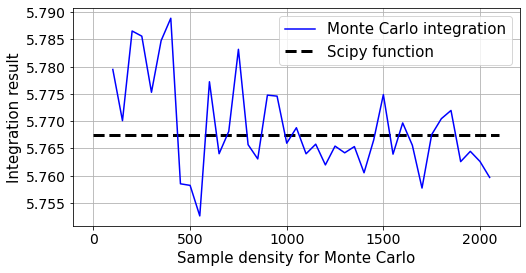

In [148]:
inte_lst = []
for i in range(100,2100,50):
    inte = monte_carlo_uniform(f1,a=0,b=4,n=i)
    inte_lst.append(inte)

result,_ = quad(f1,a=0,b=4)

plt.figure(figsize=(8,4))
plt.plot([i for i in range(100,2100,50)],inte_lst,color='blue')
plt.hlines(y=result,xmin=0,xmax=2100,linestyle='--',lw=3)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Sample density for Monte Carlo",fontsize=15)
plt.ylabel("Integration result",fontsize=15)
plt.grid(True)
plt.legend(['Monte Carlo integration','Scipy function'],fontsize=15)
plt.show()

### Not bad at all...
Therefore, we observe some small perturbations in the low sample density phase, but they smooth out nicely as the sample density increases. In any case, the absolute error is extremely small compared to the value returned by the Scipy function - on the order of 0.02%.

The Monte Carlo trick works fantastically!

### Speed of the Monte Carlo method

In this particular example, the Monte Carlo calculations are running twice as fast as the Scipy integration method!

While this kind of speed advantage depends on many factors, we can be assured that the Monte Carlo technique is not a slouch when it comes to the matter of computation efficiency.

In [157]:
%%timeit -n100 -r100
inte = monte_carlo_uniform(f1,a=0,b=4,n=500)

107 µs ± 6.57 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)


### Speed of the Scipy function

In [158]:
%%timeit -n100 -r100
quad(f1,a=0,b=4)

216 µs ± 5.31 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)


### Repeat

For a probabilistic technique like Monte Carlo integration, it goes without saying that mathematicians and scientists almost never stop at just one run but repeat the calculations for a number of times and take the average.

Here is a distribution plot from a 10,000 run experiment. As you can see, the plot almost resembles a Gaussian Normal distribution and this fact can be utilized to not only get the average value but also construct confidence intervals around that result.

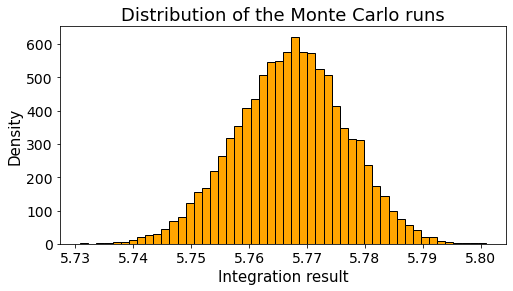

In [165]:
inte_lst = []
for i in range(10000):
    inte = monte_carlo_uniform(f1,a=0,b=4,n=500)
    inte_lst.append(inte)

plt.figure(figsize=(8,4))
plt.title("Distribution of the Monte Carlo runs",
         fontsize=18)
plt.hist(inte_lst,bins=50,color='orange',edgecolor='k')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Integration result",fontsize=15)
plt.ylabel("Density",fontsize=15)
plt.show()

### Particularly suitable for high-dimensional integrals

Although for our simple illustration (and for pedagogical purpose), we stick to a single-variable integral, the same idea can easily be extended to high-dimensional integrals with multiple variables.

And it is in this higher dimension that the Monte Carlo method particularly shines as compared to Riemann sum based approaches. The sample density can be optimized in a much more favorable manner for the Monte Carlo method to make it much faster without compromising the accuracy.

In mathematical terms, the convergence rate of the method is independent of the number of dimensions. In machine learning speak, the Monte Carlo method is the best friend you have to beat the curse of dimensionality when it comes to complex integral calculations.

---

## Summary
We introduced the concept of Monte Carlo integration and illustrated how it differs from the conventional numerical integration methods. We also showed a simple set of Python codes to evaluate a one-dimensional function and assess the accuracy and speed of the techniques.

The broader class of Monte Carlo simulation techniques is more exciting and is used in a ubiquitous manner in fields related to artificial intelligence, data science, and statistical modeling.

For example, the famous Alpha Go program from DeepMind used a Monte Carlo search technique to be computationally efficient in the high-dimensional space of the game Go. Numerous such examples can be found in practice.